# Decentmon data preparation

In [2]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [3]:
SUBDIR = "5"

In [4]:
path = f"{INPUT_DIR}/{SUBDIR}"

f_df = [load_simulation_data(f"{path}/{i}_output.log") for i in range(1, 9)]
f_df[1]

,formula_id,x,cent_trace_len,decent_trace_len,odecent_trace_len,cent_num_mess,decent_num_mess,odecent_num_mess,cent_size_mess,decent_size_mess,odecent_size_mess,cent_nb_progressions,decent_nb_progressions,odecent_nb_progressions,formula,trace
0,0,1,3,4,3,10,4,0,1.0,1.33,0.00,6,16,6,"Glob (Var ""c"")",{a| |c| |e} ; {a| |c| | } ; {a| | | |e} ; {a|...
1,1,1,3,4,3,10,4,0,1.0,1.33,0.00,6,12,6,"Ev (Var ""a"")",{ |b| |d| } ; { | | | | } ; {a|b| |d|e} ; {a|...
2,2,1,2,3,2,5,0,0,1.0,0.00,0.00,3,5,3,"Next (Var ""a"")",{a| |c| | } ; {a| | | | } ; { |b| |d| } ; { |...
3,3,1,2,3,2,5,4,0,1.0,2.00,0.00,4,10,4,"Glob (Var ""a"")",{a| | | |e} ; { |b| | | } ; { |b|c| | } ; { |...
4,4,1,3,4,3,10,4,0,1.0,1.33,0.00,6,12,6,"Ev (Var ""b"")",{ | |c|d| } ; { | | |d| } ; {a|b| |d| } ; { |...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4323,4323,5,26,30,28,125,39,189,1.0,23.13,14.93,983,4318,1224,"Ev (And (And (And (Or (Or (Neg (Var ""d""), Neg...",{a| |c| | } ; {a| |c| | } ; { | |c| |e} ; { |...
4324,4324,5,14,18,16,65,28,73,1.0,32.42,9.44,344,3639,1124,"Or (Neg (Until (Until (Var ""b"", Or (Var ""c"", ...",{a| | |d|e} ; {a| |c| |e} ; { |b| | |e} ; {a|...
4325,4325,5,14,16,17,65,11,65,1.0,5.05,7.78,195,494,1511,"Until (Next (And (Glob (Until (Var ""e"", Var ""...",{ | | |d|e} ; { | | | |e} ; {a| |c| |e} ; { |...
4326,4326,5,19,21,20,90,8,19,1.0,0.92,2.02,136,282,158,"Next (Next (Ev (And (Neg (Var ""c""), Neg (Var ...",{ |b|c|d| } ; {a| | |d|e} ; { |b| | | } ; { |...


In [5]:
patterns = range(len(f_df))

In [6]:

strategies_f_df = [split_by_dictionary(f_df[i], STRATEGIES) for i in patterns]

print(f"Datasets: {len(strategies_f_df)}. Strategies: {len(strategies_f_df[0])}. Single dataset Formulae:{len(strategies_f_df[0][0])}")
sep_strat_f_df = [pd.concat(strategies_f_df[i], ignore_index=True) for i in patterns]
sep_strat_f_df[0]

Datasets: 8. Strategies: 3. Single dataset Formulae:5147


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,5,1.00,3,"Next (Var ""e"")",{a|b|c| |e} ; { |b|c| | } ; { | |c|d| } ; { |...,orchestration
1,1,1,2,5,1.00,3,"Next (Var ""c"")",{ |b|c| | } ; {a| | | |e} ; { |b|c|d|e} ; { |...,orchestration
2,2,1,2,5,1.00,4,"Ev (Var ""d"")",{a|b| | |e} ; {a|b| |d|e} ; {a|b|c| |e} ; { |...,orchestration
3,3,1,4,15,1.00,8,"Ev (Var ""d"")",{ | | | | } ; { | |c| | } ; {a| |c| | } ; {a|...,orchestration
4,4,1,2,5,1.00,3,"Next (Var ""c"")",{ | | | | } ; { | |c| |e} ; {a| |c| | } ; { |...,orchestration
...,...,...,...,...,...,...,...,...,...
15436,5142,6,46,221,11.23,2240,"Ev (And (Var ""e"", And (Until (And (Var ""d"", V...",{ |b|c|d| } ; {a|b| | |e} ; {a|b| | |e} ; {a|...,choreography
15437,5143,6,17,206,25.13,3221,And (Or (Ev (Next (Neg (Until (Next (Glob (Va...,{a| | |d|e} ; { |b|c|d|e} ; {a|b| | | } ; { |...,choreography
15438,5144,6,32,60,4.18,779,"Ev (And (Neg (Var ""b""), Next (Neg (Until (Var...",{ |b| | | } ; {a| |c| |e} ; {a|b| |d|e} ; {a|...,choreography
15439,5145,6,24,67,6.05,646,"Until (Var ""b"", Glob (Or (Next (Until (Var ""d...",{ |b| | |e} ; {a| | | |e} ; {a|b| | |e} ; { |...,choreography


In [7]:
merged_metrics_df = [extract_metrics(sep_strat_f_df[i]) for i in patterns]

merged_metrics_df[0].max()

formula_id             5146
strategy      orchestration
value               76015.0
metric            trace_len
dtype: object

## Formula Encoding

In [8]:
df_f_ops = [extract_ops(sep_strat_f_df[i])[0] for i in patterns]

df_f_ops[0]

,total_ops_list_1,total_ops_list_10,total_ops_list_100,total_ops_list_101,total_ops_list_102,total_ops_list_103,total_ops_list_104,total_ops_list_105,total_ops_list_106,total_ops_list_107,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15436,12,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15437,4,0.0,4.0,6.0,-5.0,0.0,6.0,-1.0,0.0,5.0,...,6.0,-4.0,0.0,6.0,-2.0,0.0,5.0,-5.0,-1.0,5.0
15438,12,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15439,10,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

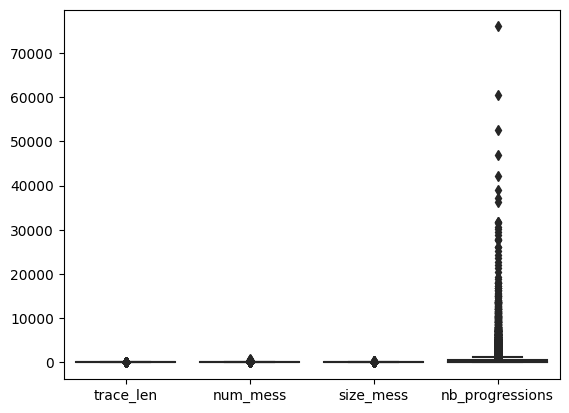

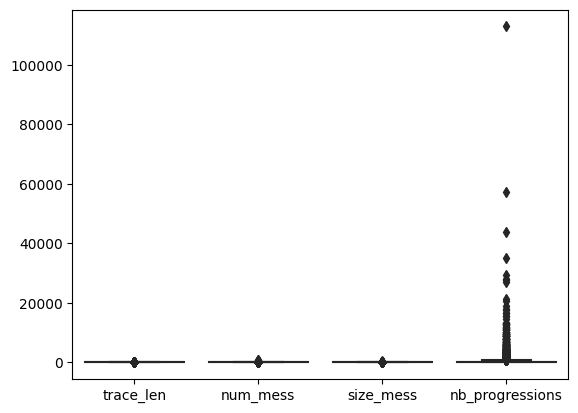

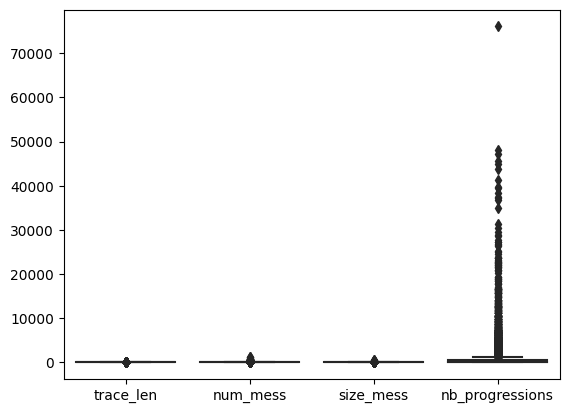

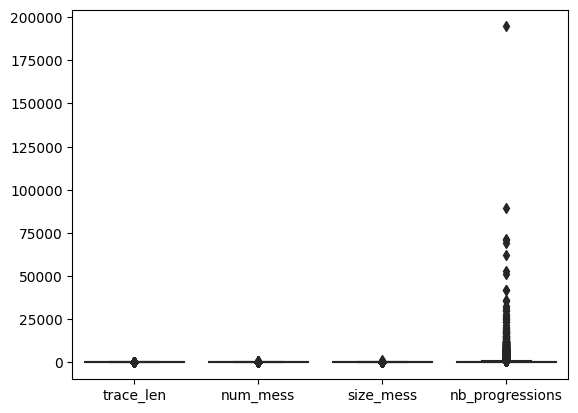

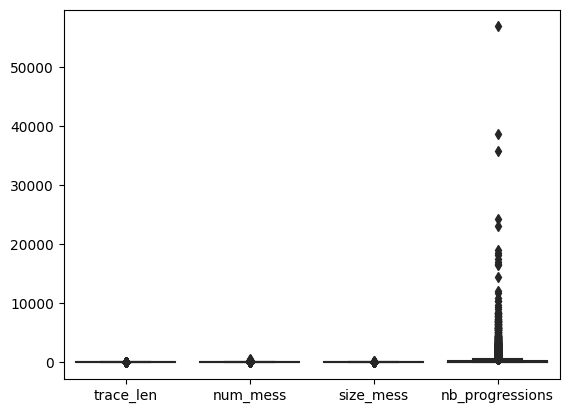

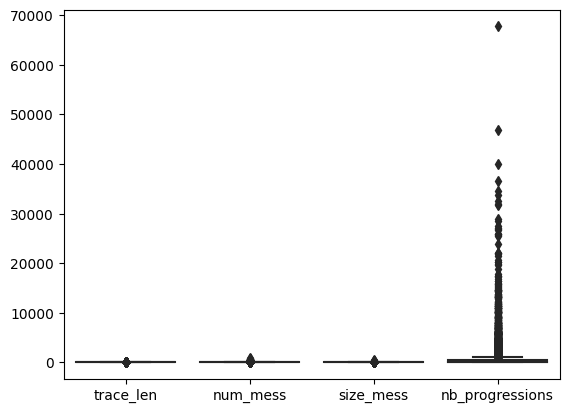

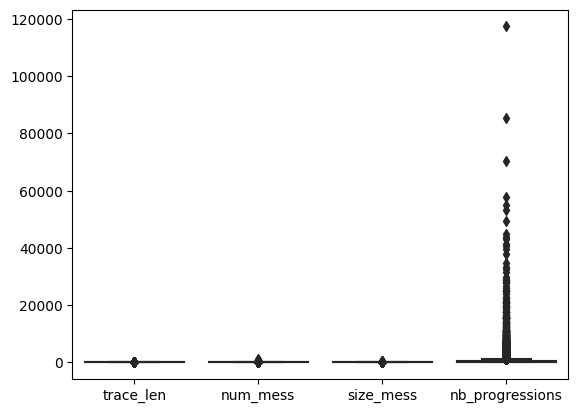

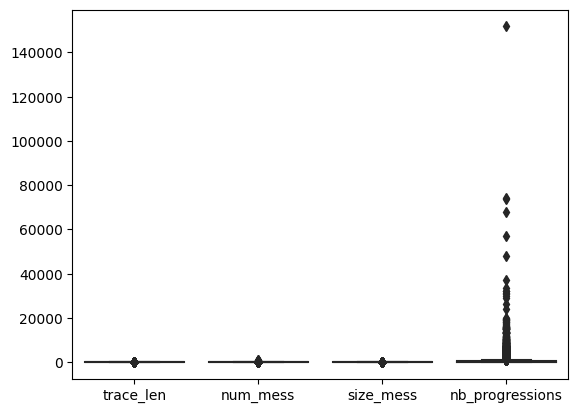

In [9]:
from matplotlib import pyplot as plt

to_drop = ['formula_id', 'x']

for i in patterns:
    cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
    plot = plot_boxplot(cleaned_up_data)
    plt.show()

In [10]:
# from matplotlib import pyplot as plt
#
# COLS = 3
# ROWS = 4
#
# fig, axs = plt.subplots(ncols=COLS, nrows=ROWS, figsize=(14,5))
#
# to_drop = ['formula_id', 'x']
#
# for i in patterns:
#     col = i % COLS
#     row = i % ROWS
#
#     cleaned_up_data = sep_strat_f_df[i].drop(to_drop, axis=1)
#     plot = plot_boxplot(cleaned_up_data, ax=axs[col][row])
#
# fig

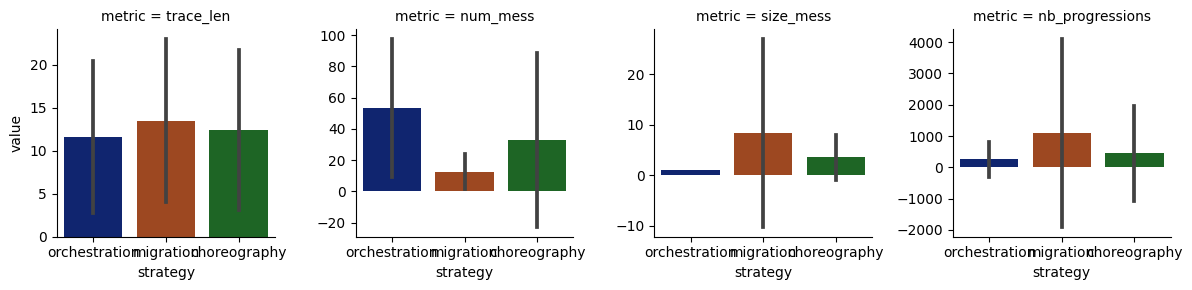

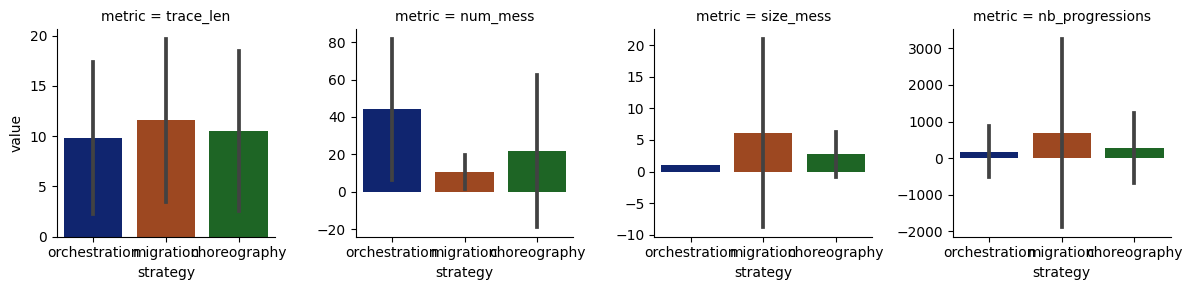

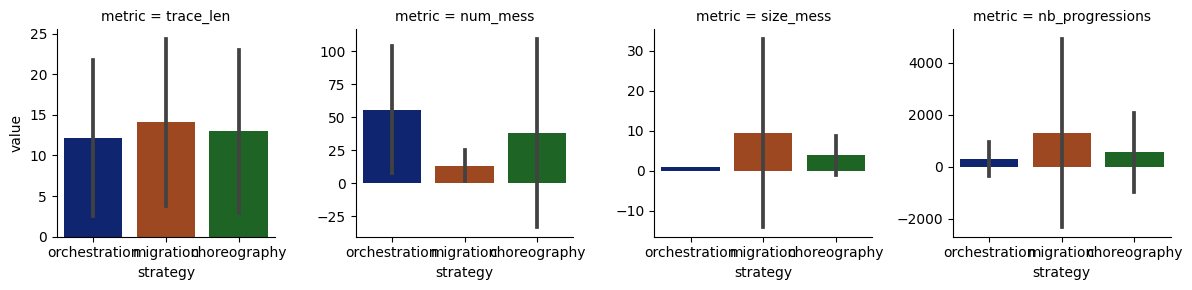

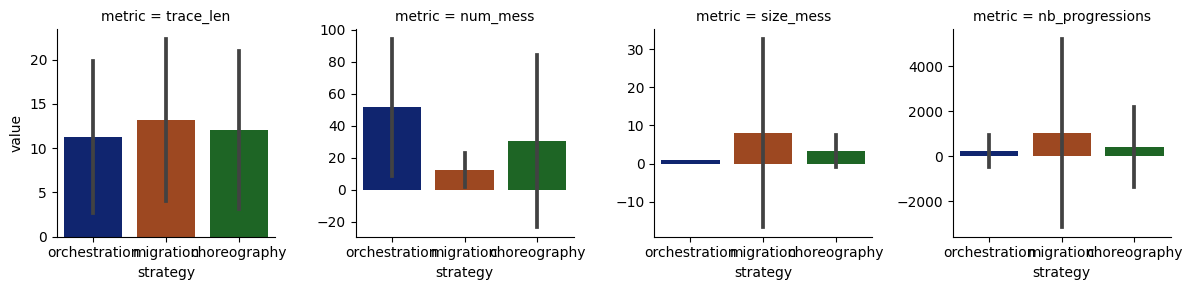

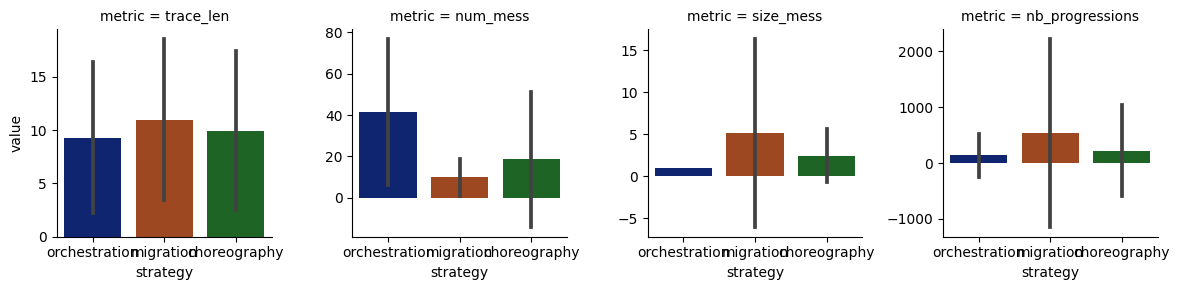

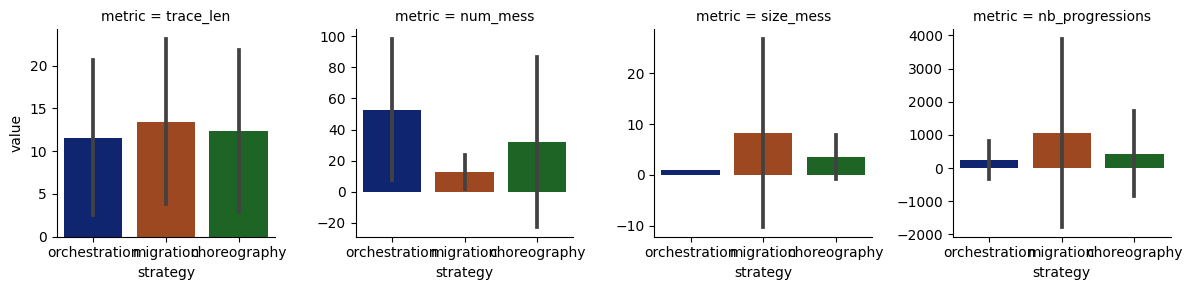

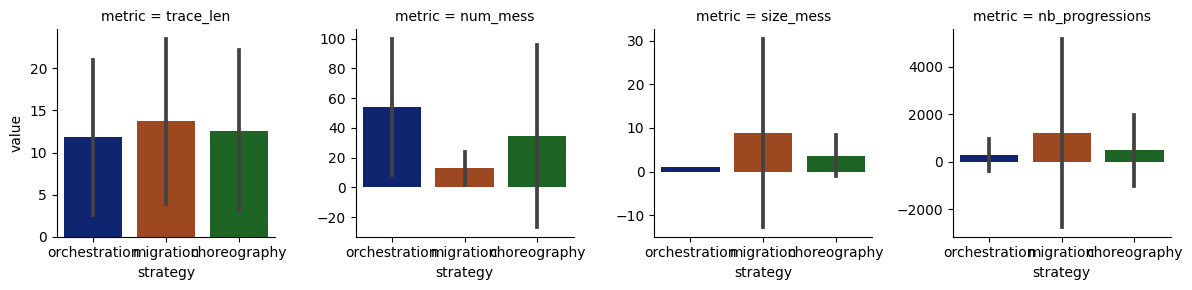

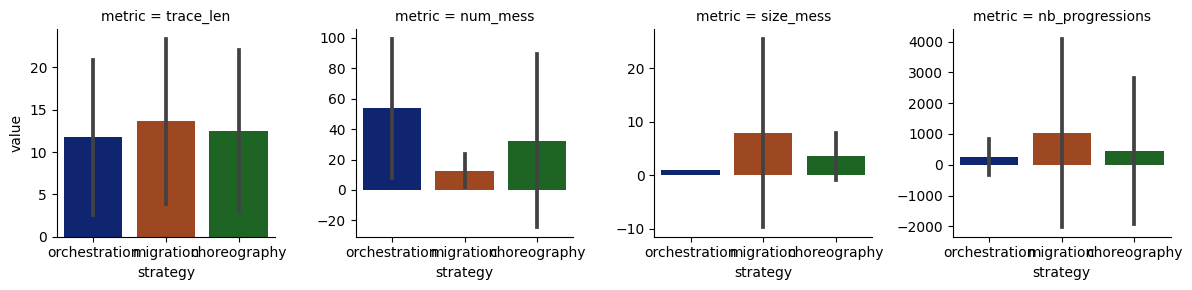

In [21]:
default_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (20,3)

for i in patterns:
    grid_plot = plot_grid_barplots(merged_metrics_df[i], grid_cell_field= 'metric',
              y_axis = 'value', x_axis = 'strategy',
              order = ['orchestration', 'migration', 'choreography'])
plt.rcParams["figure.figsize"] = default_size
#grid_plot.savefig("output/out.png")

In [12]:
merged_metrics_df[1]

,formula_id,strategy,value,metric
0,0,orchestration,3.0,trace_len
1,1,orchestration,3.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,3.0,trace_len
...,...,...,...,...
12979,4323,choreography,1224.0,nb_progressions
12980,4324,choreography,1124.0,nb_progressions
12981,4325,choreography,1511.0,nb_progressions
12982,4326,choreography,158.0,nb_progressions


In [13]:
# ndf = merged_metrics.copy()
# ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
# ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
# ndf

In [14]:
expanded_f_df = [sep_strat_f_df[i].merge(df_f_ops[i], left_index=True, right_index=True) for i in patterns]
expanded_f_df[0]

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,0,1,2,5,1.00,3,"Next (Var ""e"")",{a|b|c| |e} ; { |b|c| | } ; { | |c|d| } ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,5,1.00,3,"Next (Var ""c"")",{ |b|c| | } ; {a| | | |e} ; { |b|c|d|e} ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,5,1.00,4,"Ev (Var ""d"")",{a|b| | |e} ; {a|b| |d|e} ; {a|b|c| |e} ; { |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,4,15,1.00,8,"Ev (Var ""d"")",{ | | | | } ; { | |c| | } ; {a| |c| | } ; {a|...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,5,1.00,3,"Next (Var ""c"")",{ | | | | } ; { | |c| |e} ; {a| |c| | } ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15436,5142,6,46,221,11.23,2240,"Ev (And (Var ""e"", And (Until (And (Var ""d"", V...",{ |b|c|d| } ; {a|b| | |e} ; {a|b| | |e} ; {a|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15437,5143,6,17,206,25.13,3221,And (Or (Ev (Next (Neg (Until (Next (Glob (Va...,{a| | |d|e} ; { |b|c|d|e} ; {a|b| | | } ; { |...,choreography,4,...,6.0,-4.0,0.0,6.0,-2.0,0.0,5.0,-5.0,-1.0,5.0
15438,5144,6,32,60,4.18,779,"Ev (And (Neg (Var ""b""), Next (Neg (Until (Var...",{ |b| | | } ; {a| |c| |e} ; {a|b| |d|e} ; {a|...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15439,5145,6,24,67,6.05,646,"Until (Var ""b"", Glob (Or (Next (Until (Var ""d...",{ |b| | |e} ; {a| | | |e} ; {a|b| | |e} ; { |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for i in patterns:
    expanded_f_df[i].strategy = pd.Categorical(expanded_f_df[i].strategy)
    expanded_f_df[i]['strategy_id'] = expanded_f_df[i].strategy.cat.codes

full_scale_df = pd.concat(expanded_f_df)
full_scale_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99,strategy_id
0,0,1,2,5,1.00,3,"Next (Var ""e"")",{a|b|c| |e} ; { |b|c| | } ; { | |c|d| } ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,1,2,5,1.00,3,"Next (Var ""c"")",{ |b|c| | } ; {a| | | |e} ; { |b|c|d|e} ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,1,2,5,1.00,4,"Ev (Var ""d"")",{a|b| | |e} ; {a|b| |d|e} ; {a|b|c| |e} ; { |...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,1,4,15,1.00,8,"Ev (Var ""d"")",{ | | | | } ; { | |c| | } ; {a| |c| | } ; {a|...,orchestration,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,4,1,2,5,1.00,3,"Next (Var ""c"")",{ | | | | } ; { | |c| |e} ; {a| |c| | } ; { |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15502,5164,6,48,141,6.91,1572,"Glob (Until (Neg (Var ""d""), Or (Until (Var ""c...",{a| |c| |e} ; { |b| |d| } ; {a|b| | | } ; {a|...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15503,5165,6,21,178,18.11,3375,"Until (Var ""d"", Until (And (Or (Var ""b"", Var ...",{a| | |d| } ; { | | | |e} ; {a| |c| | } ; {a|...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15504,5166,6,19,112,12.22,1583,Ev (And (And (Or (Next (Next (Next (Neg (Var ...,{ |b|c|d|e} ; { |b|c|d|e} ; {a| |c|d| } ; { |...,choreography,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
15505,5167,6,34,228,15.05,2737,"Glob (Next (Until (Or (Var ""a"", Glob (Var ""d""...",{ |b| | |e} ; { | |c|d| } ; { |b| | |e} ; {a|...,choreography,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
# gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
# gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# # gsdf1
#
# #idx = (gsdf1['nb_progressions'].min().values.tolist())
# #gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
# gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
# gsdf2

In [17]:
# expanded_df2 = gsdf2.reset_index()
# expanded_df2

In [18]:
# f_ops_stats.hist(column='total_ops')
# f_ops_stats['total_ops'].value_counts()

In [19]:
# TODO:
# -- pycaret for classification
# Action points
# - higher number of nodes (5, 7, 9?)
# - statistics about the learning
# - test other algorithms (pycaret)